In [1]:
import pandas as pd
data = pd.read_csv('preprocessed_student_data.csv')

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996054 entries, 0 to 2996053
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sessionId          int64  
 1   timestamp          int64  
 2   x                  float64
 3   y                  float64
 4   z                  float64
 5   ppgValue           float64
 6   hr                 float64
 7   hrIbi              float64
 8   hrStatus           float64
 9   ibiStatus          float64
 10  notification       float64
 11  engagement         float64
 12  affect             object 
 13  context            object 
 14  timestamp_seconds  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 342.9+ MB


In [34]:
# Assuming normalized_student_data is your DataFrame
# Decide on a downsampling rate; for example, keep every 5th sample
downsampling_rate = 5

# Use the modulo operator to filter rows
downsampled_data = data.iloc[::downsampling_rate]

downsampled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599211 entries, 0 to 2996050
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sessionId          599211 non-null  int64  
 1   timestamp          599211 non-null  int64  
 2   x                  599211 non-null  float64
 3   y                  599211 non-null  float64
 4   z                  599211 non-null  float64
 5   ppgValue           599211 non-null  float64
 6   hr                 599211 non-null  float64
 7   hrIbi              599211 non-null  float64
 8   hrStatus           599211 non-null  float64
 9   ibiStatus          599211 non-null  float64
 10  notification       0 non-null       float64
 11  engagement         0 non-null       float64
 12  affect             388601 non-null  object 
 13  context            397878 non-null  object 
 14  timestamp_seconds  599211 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 

In [30]:
import pandas as pd
# Drop rows with NaN values in either features or target
cleaned_data = data.dropna(subset=['context', 'affect'])

# Selecting features for X
features = ['sessionId','x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi', 'hrStatus', 'ibiStatus']
X = cleaned_data[features]

# For multi-output targets:
y_multi = cleaned_data[['context', 'affect']]

# For separate models:
y_context = cleaned_data['context']
y_affect = cleaned_data['affect']


In [4]:
import pandas as pd

# Assuming 'df' is your DataFrame
has_nan = y_multi.isnull().any().any()

if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")


The DataFrame does not contain any NaN values.


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_context, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_context_encoded = le.fit_transform(y_train_c)
y_test_context_encoded = le.transform(y_test_c)

In [27]:
# Does not work as intended. Labels are in the train set.

from sklearn.model_selection import train_test_split

# Assuming 'sessionId' is the column that identifies sessions
session_ids = X['sessionId'].unique()
train_sessions, test_sessions = train_test_split(session_ids, test_size=0.2, random_state=42)

train_data = X[X['sessionId'].isin(train_sessions)]
temp_test_data =X[X['sessionId'].isin(test_sessions)]

# Optionally, further split the test set into validation and test sets
valid_sessions, test_sessions = train_test_split(temp_test_data['sessionId'].unique(), test_size=0.5, random_state=42)
valid_data = temp_test_data[temp_test_data['sessionId'].isin(valid_sessions)]
test_data = temp_test_data[temp_test_data['sessionId'].isin(test_sessions)]

train_data = train_data.drop('sessionId', axis=1)
valid_data = valid_data.drop('sessionId', axis=1)
test_data = test_data.drop('sessionId', axis=1)


In [29]:
#print(train_data)
print(train_data.shape)
#print(valid_data)
print(valid_data.shape)
#print(test_data)
print(test_data.shape)

(748887, 8)
(87949, 8)
(99307, 8)


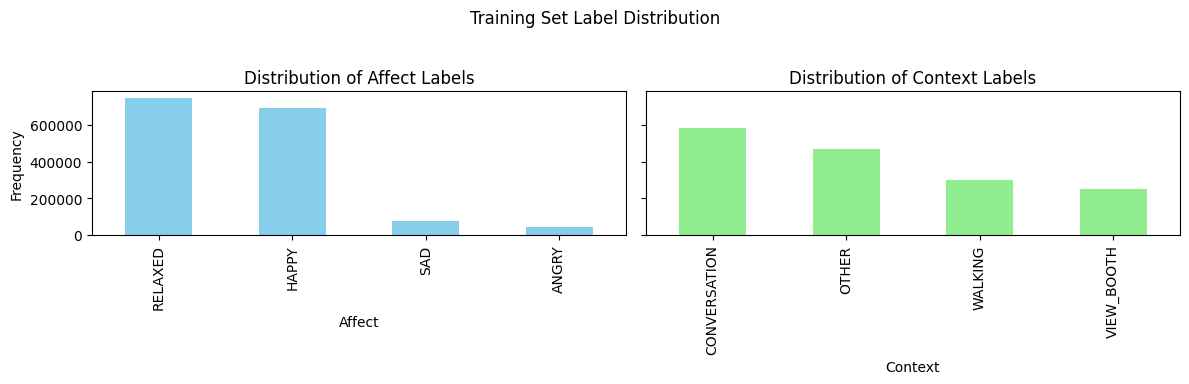

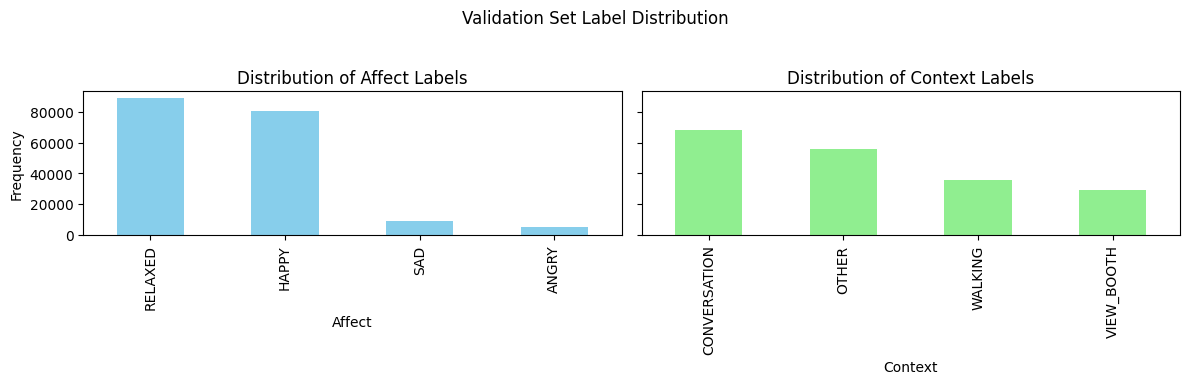

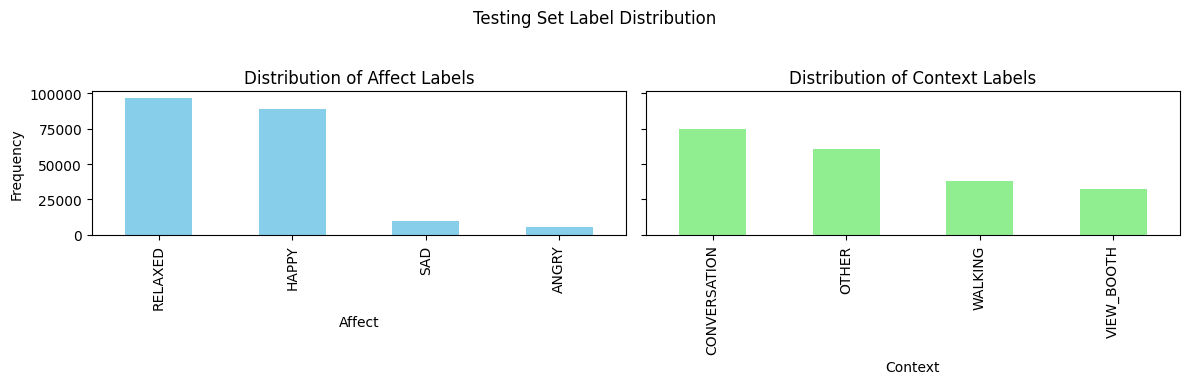

In [7]:
import matplotlib.pyplot as plt

def plot_label_distribution(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    # Plot distribution of 'affect' labels
    data['affect'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
    axs[0].set_title('Distribution of Affect Labels')
    axs[0].set_xlabel('Affect')
    axs[0].set_ylabel('Frequency')

    # Plot distribution of 'context' labels
    data['context'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
    axs[1].set_title('Distribution of Context Labels')
    axs[1].set_xlabel('Context')
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Visualize label distribution for each set
plot_label_distribution(train_data, 'Training Set Label Distribution')
plot_label_distribution(valid_data, 'Validation Set Label Distribution')
plot_label_distribution(test_data, 'Testing Set Label Distribution')


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Encoding labels
encoder = OneHotEncoder(sparse=False)
y_context_encoded = encoder.fit_transform(y_context.reshape(-1, 1))
y_affect_encoded = encoder.fit_transform(y_affect.reshape(-1, 1))

# Splitting data
X_train, X_temp, y_context_train, y_context_temp, y_affect_train, y_affect_temp = train_test_split(X, y_context_encoded, y_affect_encoded, test_size=0.3)
X_val, X_test, y_context_val, y_context_test, y_affect_val, y_affect_test = train_test_split(X_temp, y_context_temp, y_affect_temp, test_size=0.5)

# Rescaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM if needed
# X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [32]:
from keras.models import Model
from keras.layers import Input, Conv1D, LSTM, Dense, Flatten, Dropout, concatenate

input_layer = Input(shape=(time_steps, 4))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(100, return_sequences=False)(conv1)
flat1 = Flatten()(lstm1)
drop1 = Dropout(0.5)(flat1)
dense1 = Dense(100, activation='relu')(drop1)

# Context output
context_output = Dense(num_activities, activation='softmax', name='context')(dense1)

# Affect output
affect_output = Dense(num_emotions, activation='softmax', name='affect')(dense1)

model = Model(inputs=input_layer, outputs=[context_output, affect_output])

model.compile(optimizer='adam', loss={'context': 'categorical_crossentropy', 'affect': 'categorical_crossentropy'}, metrics=['accuracy'])

model.summary()


NameError: name 'time_steps' is not defined

In [ ]:
history = model.fit(X_train_scaled, [y_context_train, y_affect_train],
                    validation_data=(X_val_scaled, [y_context_val, y_affect_val]),
                    epochs=50, batch_size=32)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd

class CNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * (num_features // 2), num_classes)
    
    def forward(self, x):
        x = x.unsqueeze(1)  # Adding a channel dimension
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layer
        x = self.fc1(x)
        return x


In [10]:
def train_model(model, train_loader, test_loader, learning_rate=0.001, epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        print(f'Accuracy: {100 * correct / total}%')

    return model


In [11]:
# Example column names for features and labels
feature_columns = ['x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi', 'hrStatus', 'ibiStatus']  # adjust as needed
label_columns = ['affect', 'kontext']  # adjust as needed for your tasks

# Convert training data to NumPy arrays
X_train = train_data[feature_columns].values.astype(np.float32)
y_train = train_data[label_columns].values.astype(np.int64)  # Assuming labels are integer classes

# Convert test data to NumPy arrays (assuming you're following a similar pattern for test data)
X_test = test_data[feature_columns].values.astype(np.float32)
y_test = test_data[label_columns].values.astype(np.int64)

train_dataset = TensorDataset(torch.from_numpy(X_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(torch.from_numpy(test_data))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

valid_dataset = TensorDataset(torch.from_numpy(valid_data))
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False)

num_features = len(features)  # Number of input features
num_classes_affect = train_data['affect'].nunique()
num_classes_kontext = train_data['kontext'].nunique()

# Initialize models
model_affect = CNN(num_features, num_classes_affect)
model_kontext = CNN(num_features, num_classes_kontext)

# Train and evaluate models as previously outlined

# Determine the number of unique classes for each target
num_classes_affect = train_data['affect'].nunique()
num_classes_kontext = train_data['kontext'].nunique()

# Train models
model_affect_trained = train_model(model_affect, train_loader, test_loader)
#model_kontext_trained = train_model(model_kontext, train_loader_kontext, test_loader_kontext)


TypeError: expected np.ndarray (got DataFrame)

In [15]:
!pip install keras tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.0 MB 7.9 MB/s eta 0:00:48
   ---------------------------------------- 0.9/377.0 MB 11.7 MB/s eta 0:00:33
   ---------------------------------------- 1.8/377.0 MB 16.2 MB/s eta 0:00:24
  

In [14]:
from keras.models import Model
from keras.layers import Input, Conv1D, LSTM, Dense, Flatten, Dropout, concatenate

input_layer = Input(shape=(time_steps, 4))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(100, return_sequences=False)(conv1)
flat1 = Flatten()(lstm1)
drop1 = Dropout(0.5)(flat1)
dense1 = Dense(100, activation='relu')(drop1)

# Context output
context_output = Dense(num_activities, activation='softmax', name='context')(dense1)

# Affect output
affect_output = Dense(num_emotions, activation='softmax', name='affect')(dense1)

model = Model(inputs=input_layer, outputs=[context_output, affect_output])

model.compile(optimizer='adam', loss={'context': 'categorical_crossentropy', 'affect': 'categorical_crossentropy'}, metrics=['accuracy'])

model.summary()


ModuleNotFoundError: No module named 'tensorflow'